**AKBANK MAKİNE ÖĞRENMESİ BOOTCAMP PROJESİ**

**1.VERİ SETİ**

Proje kapsamında kullanılan veri seti; psikiyatristlerin, 120 psikoloji hastasından oluşan 17 temel belirtisi olan Mani Bipolar Bozukluğu, Depresif Bipolar Bozukluğu, Majör Depresif Bozukluğu ve Normal Bireyleri teşhis etmek için kullandığı bir veri setidir. Veri seti, psikiyatristlerin tanımlanan bozuklukları teşhis etmek için kullandığı 17 temel semptomu içermektedir. Davranışsal semptomlar hastaların seviyeleri olarak kabul edilir:
1. Üzüntü (Sadness),
2. Bitkinlik (Exhaustness),
3. Keyif (Euphoric),
4. Uyku bozukluğu (Sleep disorder),
5. Ruh hali değişimleri (Mood swings),
6. İntihar düşünceleri (Suicidal thoughts),
7. Anoreksiya (Anorexia),
8. Otoriteye saygı (Authority Respect),
9. Açıklamaya çalışmak (Try-explaining),
10. Sinir krizi (Nervous breakdown),
11. Görmezden gelip ilerlemek (Ignore & Move-on),
12. Hataları kabul etmek (Admitting mistakes),
13. Aşırı düşünmek (Overthinking),
14. Agresif tepki (Aggressive response),
15. İyimserlik (Optimism),
16. Cinsel Etkinlik (Sexual activity),
17. Konsantrasyon (Concentration).

Terapi süresini uzmanlaşmış danışmanlık, kişisel gelişim ve yaşam becerilerinin zenginleştirilmesi için kullanan bireyler "Normal bireyleri" ifade eder. Bu tür bireylerde küçük ruhsal sorunlar bulunabilse de, Majör Depresif Bozukluk ve Bipolar Bozukluktan muzdarip olanlardan farklıdırlar.

In [189]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [190]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [191]:
!kaggle datasets download -d cid007/mental-disorder-classification

Dataset URL: https://www.kaggle.com/datasets/cid007/mental-disorder-classification
License(s): CC0-1.0
  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 4.83MB/s]


In [192]:
!unzip \*.zip  && rm *.zip

Archive:  mental-disorder-classification.zip
replace Dataset-Mental-Disorders.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [193]:
import pandas as pd

dataset = pd.read_csv("Dataset-Mental-Disorders.csv")
dataset.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


Yararlanılan kaynaklar: https://burcukoculu.medium.com/google-colabde-kaggle-veri-setini-nas%C4%B1l-%C3%A7ekip-%C3%BCzerinde-%C3%A7al%C4%B1%C5%9Fabiliriz-fd983434fcdd

**2.KEŞİFSEL VERİ ANALİZİ (EDA)**

In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

Veri seti, 19 sütun ve 120 satırdan oluşmaktadır. Bu veri setindeki 17 değişken, "Expert Diagnose (Uzman Teşhisi) " isimli hedef değişkenin tahmini için kullanılacaktır.



In [195]:
dataset.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [196]:
for i in range(18):
    parametres = dataset.iloc[:,i+1].value_counts()
    print(parametres, end = '\n')
    print(sum(parametres), end = '\n\n')

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64
120

Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64
120

Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64
120

Sleep dissorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64
120

Mood Swing
NO     63
YES    57
Name: count, dtype: int64
120

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64
120

Anorxia
NO     74
YES    46
Name: count, dtype: int64
120

Authority Respect
NO     73
YES    47
Name: count, dtype: int64
120

Try-Explanation
NO     63
YES    57
Name: count, dtype: int64
120

Aggressive Response
NO     62
YES    58
Name: count, dtype: int64
120

Ignore & Move-On
NO     70
YES    50
Name: count, dtype: int64
120

Nervous Break-down
YES    62
NO     58
Name: count, dtype: int64
120

Admit Mistake

Veri setindeki hasta numaraları hariç 1-4 arasındaki değişkenlerin en fazla 4, 5-14 arasındaki değişkenlerin en fazla 2 ve 15-17 arasındaki değişkenlerin en fazla 10 farklı kategoriden oluşması beklenmektedir. Fakat "Suicidal thoughts" değişkeninin yes ve no olarak iki cevap dışında 3 tekil değerden oluştuğu görülmektedir.

In [197]:
dataset['Suicidal thoughts'].unique()

array(['YES ', 'YES', 'NO'], dtype=object)

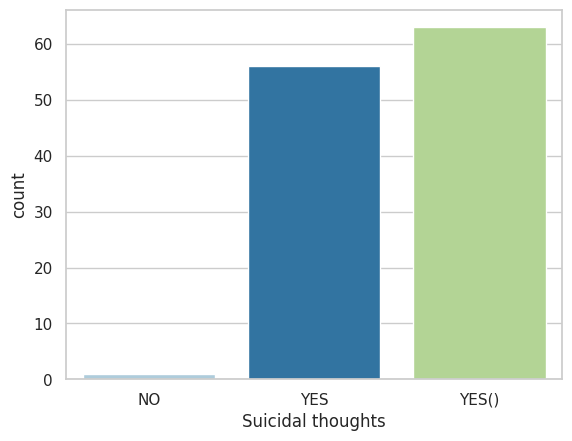

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='Suicidal thoughts', hue='Suicidal thoughts', data=dataset, palette='Paired')
plt.xticks([0,1,2], ['NO', 'YES', 'YES()'])
plt.show()

'Suicidal thoughts' değişkeninde "yes" olarak girilen  çoğu değerin "yes(boşluk)" olarak girildiği görülmektedir. Bu değerlerin veri ön işleme aşamasında aynı grupta olabilmesi için aynı yani "yes" olarak boşluksuz bir şekilde girilmesi gerekmektedir.

In [199]:
print(dataset.isnull().sum())

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


Veri setindeki değişkenlerde eksik değer bulunmadığı için herhangi bir eksik (kayıp) değer işlemine gerek duyulmamıştır.

Yararlanılan kaynaklar https://gokerguner.medium.com/machine-learning-1-7d4581caa291

*3.VERİ ÖN İŞLEME*

In [200]:
dataset = dataset.drop('Patient Number', axis=1)
dataset.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


Veri setini analiz ederken hasta numaraları analize dahil olmayacağı için "Patient Number" değişkeni veri setinden çıkarılmıştır.

In [201]:
dataset['Suicidal thoughts'] = dataset['Suicidal thoughts'].replace('YES ', 'YES')
dataset['Suicidal thoughts'].unique()

array(['YES', 'NO'], dtype=object)

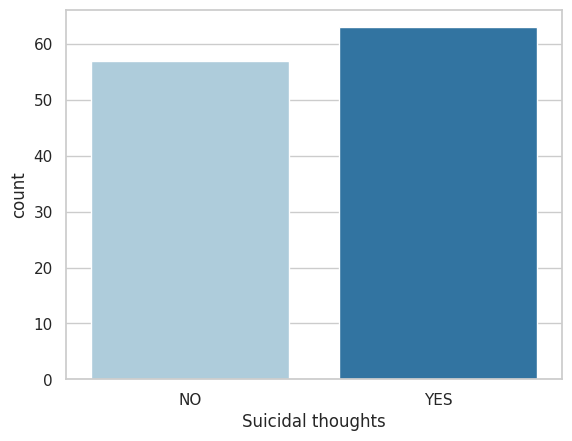

In [202]:
plt.figure()
sns.countplot(x='Suicidal thoughts', hue='Suicidal thoughts', data=dataset, palette='Paired')
plt.xticks([0,1], ['NO', 'YES'])
plt.show()

Daha sonra "Suicidal thoughts" değişkenindeki farklı olarak girilen 'yes' değerlerini aynı ifade edilecek şekilde düzenleyerek 2 kategori haline getirilmiştir.

*4.VERİ GÖRSELLEŞTİRME*

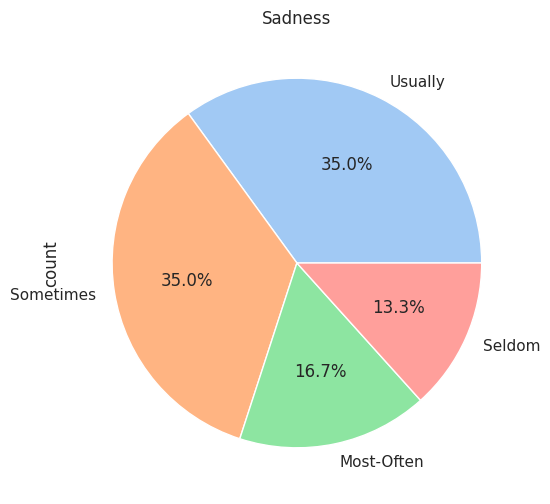

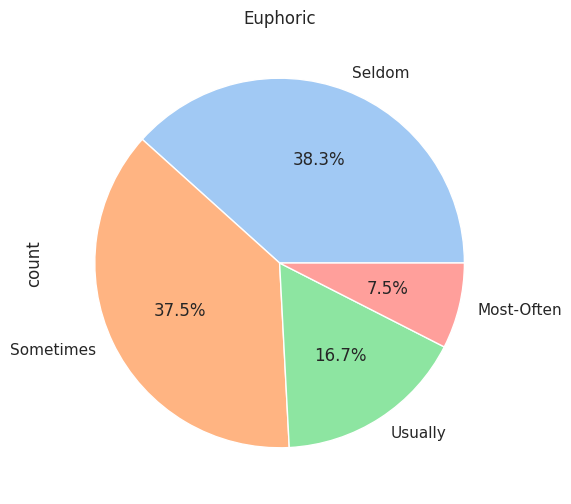

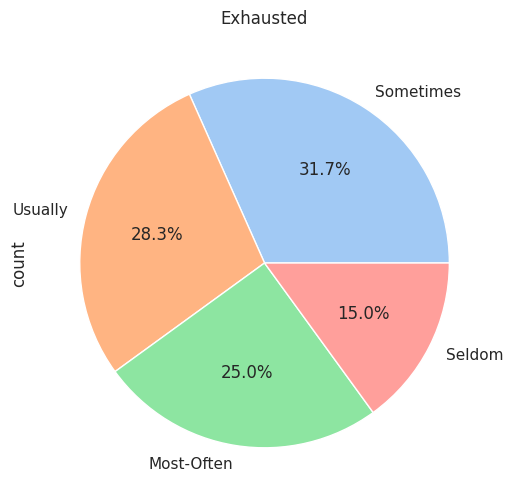

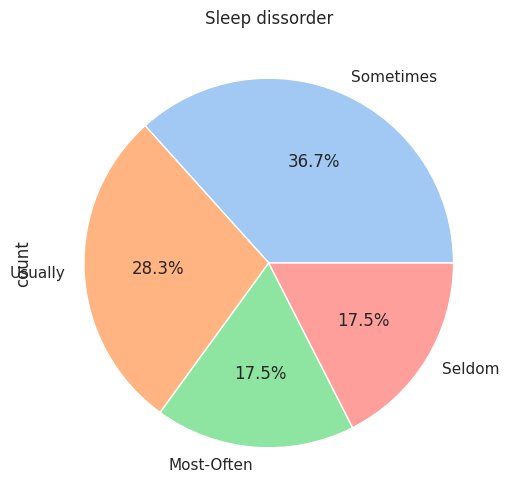

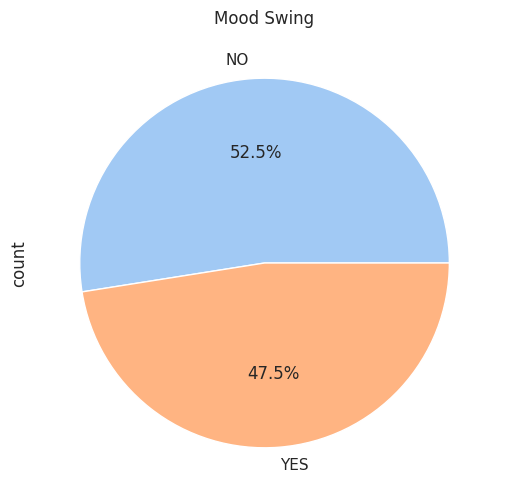

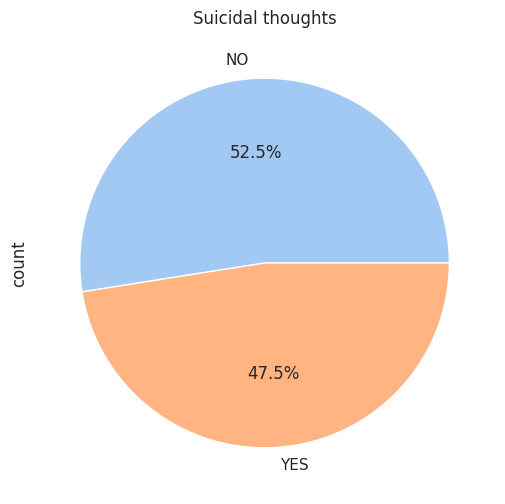

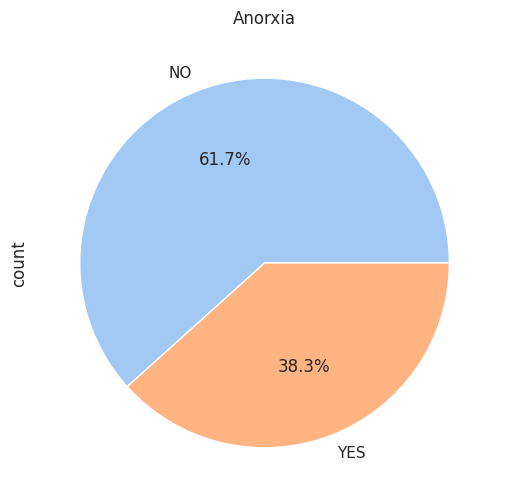

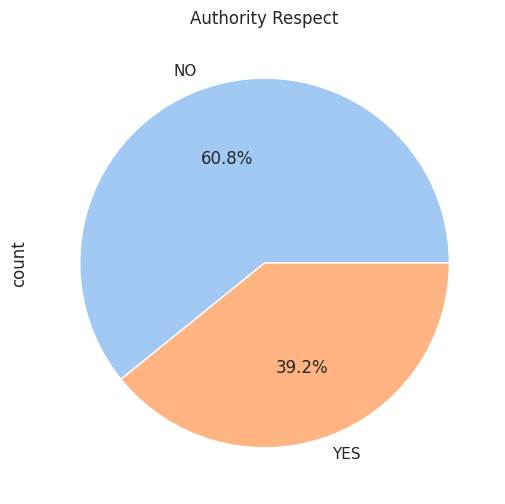

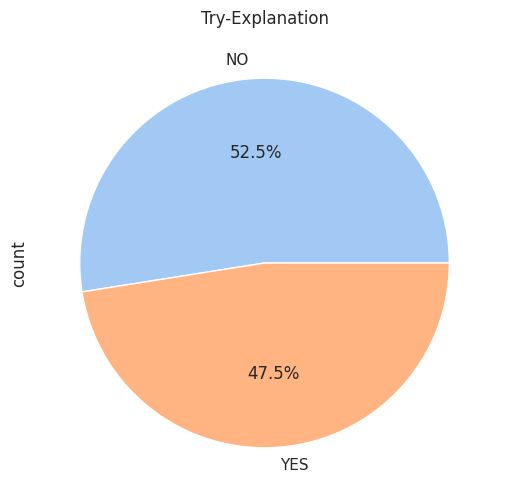

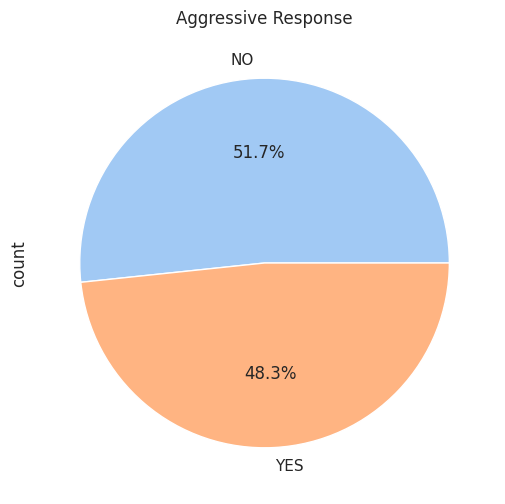

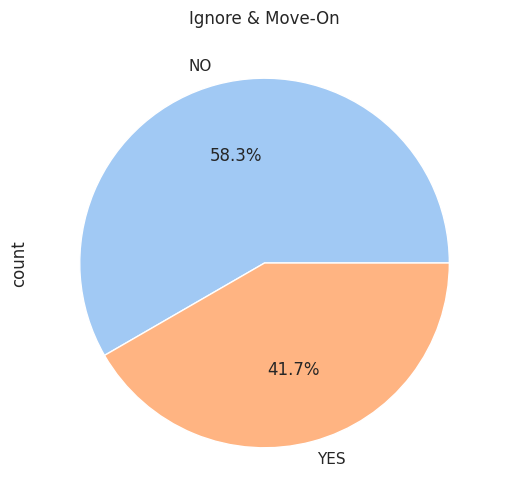

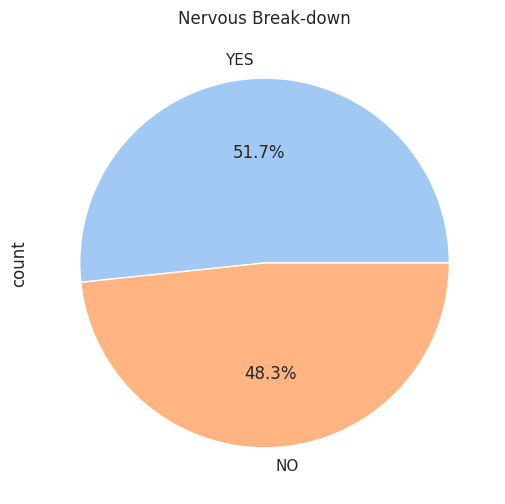

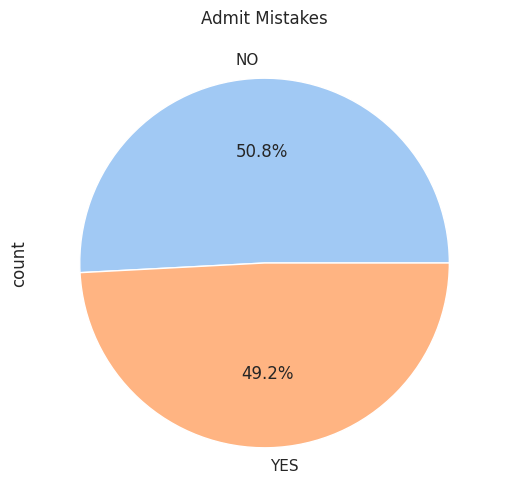

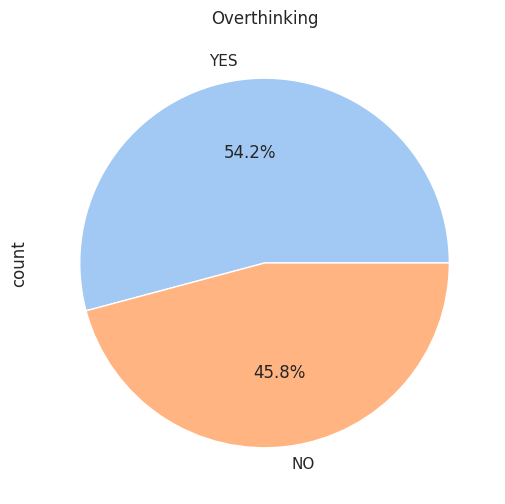

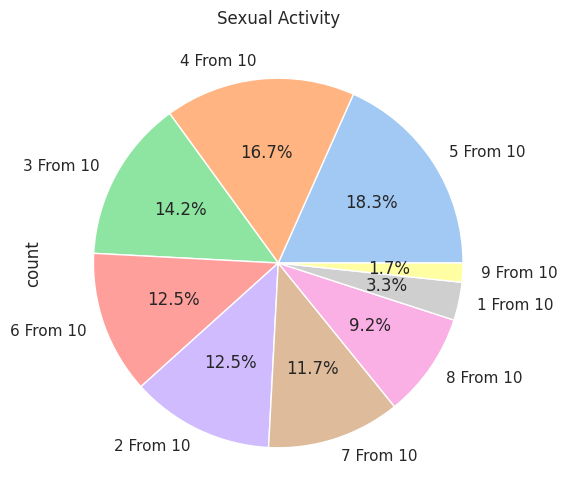

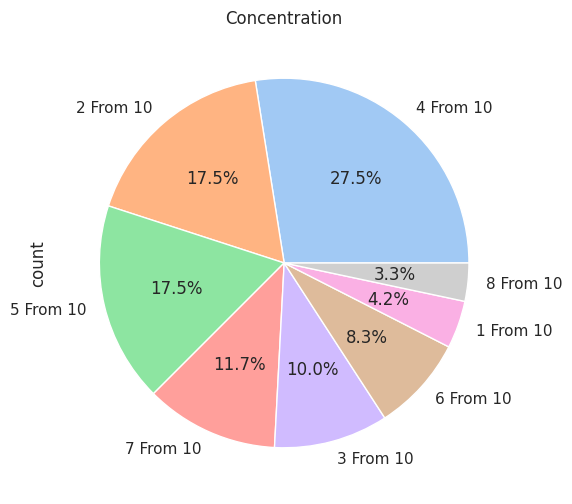

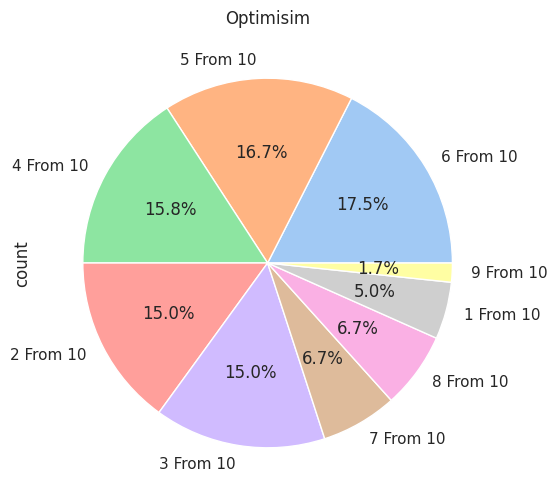

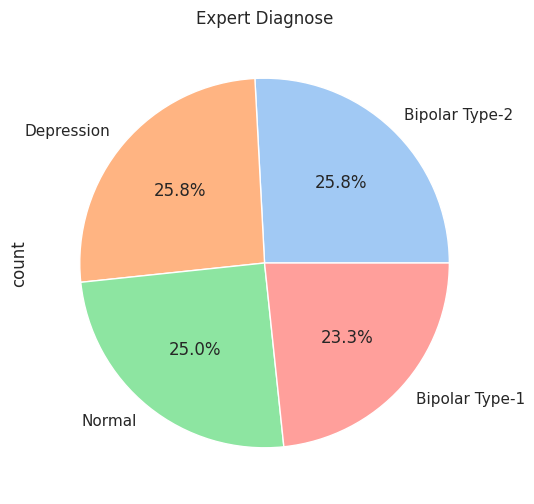

In [203]:
pastel_palette = sns.color_palette("pastel")

for variable in dataset:
    plt.figure(figsize=(6,6))
    dataset[variable].value_counts().plot.pie(autopct='%1.1f%%', colors=pastel_palette)
    plt.title(variable)
    plt.show()

120 psikoloji hastasının doldurduğu anket sorularına göre, hastalar kendilerinin;
* genellikle ve ara sıra üzüntü duyduğunu,
* ara sıra ve nadiren keyifli olduklarını,
* genellikle ve ara sıra bitkin olduklarını,
* ara sıra uyku bozukluğu yaşadıklarını,
* ruh hali değişimleri yaşamadıklarını,
* intihar düşünceleri olmadıklarını,
* anoreksiya hastalığına sahip olmadıklarını,
* otoriteye saygı duymadıklarını,
* açıklamaya çalışmadıklarını,
* agresif tepki vermediklerini,
* görmezden gelip ilerlediklerini,
* sinir krizi geçirdiklerini,
* hatalarını kabul etmediklerini,
* aşırı düşündüklerini,
* cinsel etkinlik seviyelerinin 10 üzerinden 5 olduğunu,
* konsantrasyon seviyelerinin 10 üzerinden 4 olduğunu,
* iyimserlik seviyelerinin 10 üzerinden 6 olduğunu

ifade ettiklerini söyleyebiliriz.

In [204]:
dataset.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [205]:
dataset.dtypes

Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object

In [206]:
for i in range(0,4):
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Seldom', 0)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Sometimes', 1)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Usually', 2)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Most-Often', 3)

In [207]:
for i in range(4,14):
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('YES', 1)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('NO', 0)

In [208]:
for i in range(14, 17):
    for r in range(len(dataset)):
        value = dataset.iloc[r, i]
        if isinstance(value, str) and 'From 10' in value:
            numeric_value = int(value.split(' ')[0])
            dataset.iloc[r, i] = numeric_value


In [209]:
for i in range(17,18):
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Normal', 0)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Bipolar Type-1', 1)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Bipolar Type-2', 2)
    dataset.iloc[:,i] = dataset.iloc[:,i].replace('Depression', 3)

In [210]:
dataset.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


* 1.-4. değişkenler dört tane sıralanabilir,
* 5.-14. değişkenler iki tane sınıflanabilir,
* 15.-17. değişkenler on tane sıralanabilir ve
* 18.değişken dört sınıflanabilir

kategoriden oluştuğu için makine öğrenimi modelleri gibi algoritmaların kullanılabilmesini kolaylaştırmak için kategorik olan değişkenlerdeki değerler türlerine göre birer sayısal değer ile ifade edilmiştir.

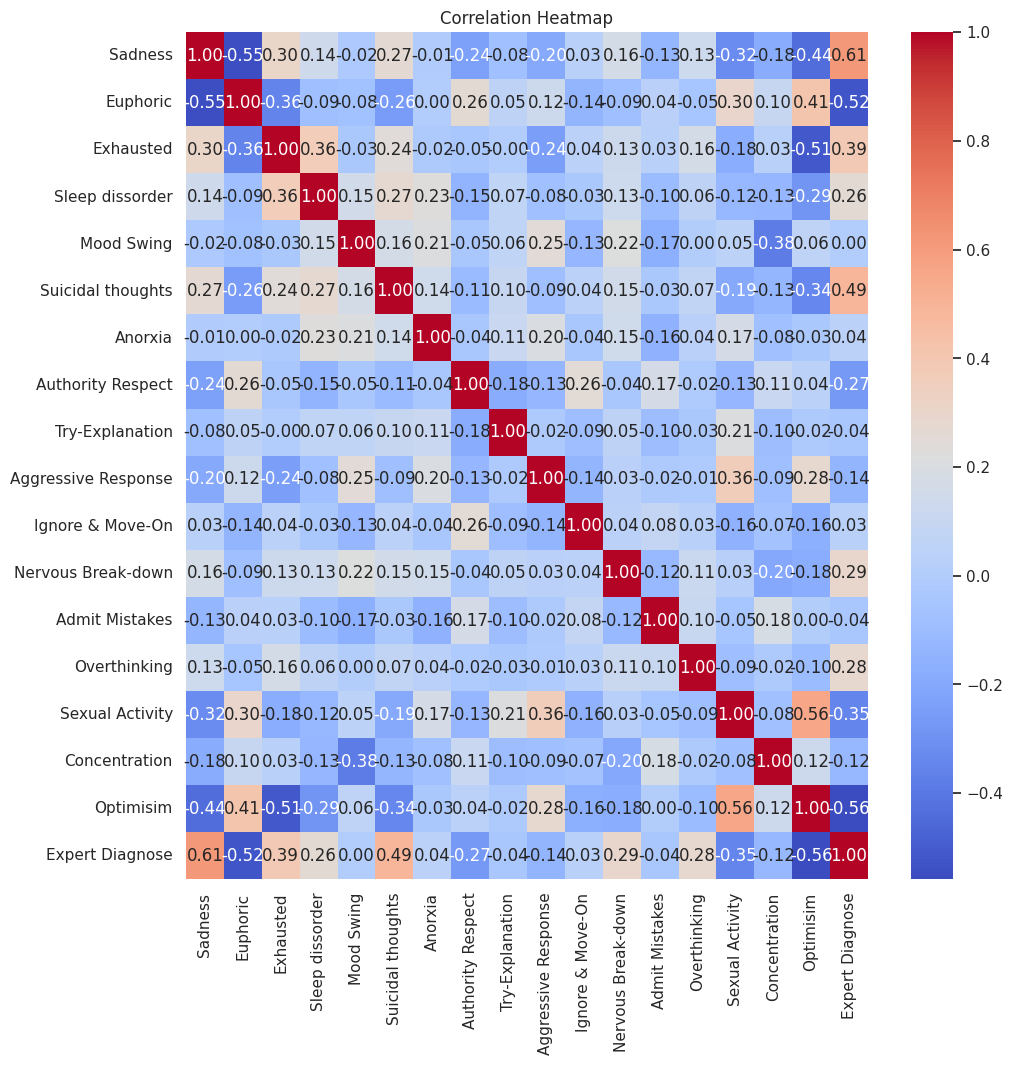

In [211]:
sns.set(style="whitegrid")

correlation_matrix = dataset.corr()

plt.figure(figsize=(11,11))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()

Verisetindeki değişkenler arası ilişki incelendiğinde;
* en yüksek ilişkinin uzman teşhisi ile üzüntü arasındaki %61'lik ilişki olduğunu söyleyebiliriz. Bu durumda üzgün bireylerin daha çok psikolojik rahatsızlığa yakalandığını ifade edebiliriz.
* en düşük ilişkinin uzman teşhisi ile iyimserlik arasındaki ters yönlü %56'lık ilişki olduğunu söyleyebiliriz. Bu durumda iyimser olan bireylerin daha az psikolojik rahatsızlığa yakalandığını ifade edebiliriz.

*5.ML ALGORİTMALARININ UYGULANMASI*

In [212]:
for column in dataset.columns:
    dataset[column] = dataset[column].astype(int)

print(dataset.dtypes)

Sadness                int64
Euphoric               int64
Exhausted              int64
Sleep dissorder        int64
Mood Swing             int64
Suicidal thoughts      int64
Anorxia                int64
Authority Respect      int64
Try-Explanation        int64
Aggressive Response    int64
Ignore & Move-On       int64
Nervous Break-down     int64
Admit Mistakes         int64
Overthinking           int64
Sexual Activity        int64
Concentration          int64
Optimisim              int64
Expert Diagnose        int64
dtype: object


In [213]:
dataset.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [214]:
X = dataset.iloc[:, 0:17]
y = dataset.iloc[:, 17:18]

Veri setindeki değişkenlerin bağımlı (y) ve bağımsız değişken (X) olmak üzere atamaları yapılır.

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Veri seti %70 eğitim ve %30 test verisi olmak üzere ikiye ayrılmıştır.

* **Lojistik Regresyon**

In [268]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report

logistic_classifier_model = LogisticRegression(multi_class='multinomial')
logistic_classifier_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [269]:
y_logreg_pred_test = logistic_classifier_model.predict(X_test)
y_logreg_pred_train = logistic_classifier_model.predict(X_train)

In [270]:
print('*** Logistic Regression ***\n')
logreg_train_accuracy = accuracy_score(y_train, y_logreg_pred_train)
print(f"Training Accuracy: {logreg_train_accuracy:.2%}")

logreg_accuracy = accuracy_score(y_test, y_logreg_pred_test)
print(f"Testing Accuracy: {logreg_accuracy:.2%}")

*** Logistic Regression ***

Training Accuracy: 100.00%
Testing Accuracy: 77.78%


Lojistik regresyon sonucunda modelin eğitim verisinde başarı oranı %100 ve test verisinde başarı oranı %77 olmuştur. Böylelikle modelin ezber (Overfitting) sorunu olduğunu söyleyebiliriz.

In [271]:
logistic_report = classification_report(y_test, y_logreg_pred_test)
print('************************ Logistic Regression ************************\n')
print(logistic_report)

************************ Logistic Regression ************************

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.60      0.86      0.71         7
           2       1.00      0.86      0.92         7
           3       0.70      0.78      0.74         9

    accuracy                           0.78        36
   macro avg       0.80      0.80      0.79        36
weighted avg       0.81      0.78      0.78        36



Expert Diagnose:

Normal: 0

Bipolar Type-1: 1

Bipolar Type-2: 2

Depression: 3

**F1 score, bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir ölçümdür. Hassasiyet (precision) ve duyarlılık (recall) metriklerinin harmonik ortalamasını temsil eder. F1 score, hem hassasiyetin hem de duyarlılığın yüksek olması durumunda yüksek bir değer alır, bu nedenle dengeli bir sınıflandırma performansını yansıtır.**

Lojistik regresyonun başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %92 başarı oranı ile Bipolar tip-2 hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %71 başarı oranı ile Bipolar tip-1 hastalığı olduğu

görülmektedir. Genel olarak, elde edilen accuracy değeri (%78) orta düzeydedir. Ancak, sınıflar arasında bazı farklılıklar olduğu görülmektedir.

* **Ridge Regresyon**

In [272]:
ridge_classifier_model = RidgeClassifier()
ridge_classifier_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifier()

In [273]:
y_ridreg_pred_test = ridge_classifier_model.predict(X_test)
y_ridreg_pred_train = ridge_classifier_model.predict(X_train)

In [274]:
print('*** Ridge Regression ***\n')
ridreg_train_accuracy = accuracy_score(y_train, y_ridreg_pred_train)
print(f"Training Accuracy: {ridreg_train_accuracy:.2%}")

ridreg_accuracy = accuracy_score(y_test, y_ridreg_pred_test)
print(f"Testing Accuracy: {ridreg_accuracy:.2%}")

*** Ridge Regression ***

Training Accuracy: 96.43%
Testing Accuracy: 75.00%


Ridge regresyon sonucunda modelin eğitim verisinde başarı oranı %96 ve test verisinde başarı oranı %75 olmuştur.

In [275]:
ridge_report = classification_report(y_test, y_ridreg_pred_test)
print('************************ Ridge Regression ************************\n')
print(ridge_report)

************************ Ridge Regression ************************

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.67      0.86      0.75         7
           2       1.00      0.86      0.92         7
           3       0.64      0.78      0.70         9

    accuracy                           0.75        36
   macro avg       0.78      0.78      0.77        36
weighted avg       0.77      0.75      0.75        36



Ridge regresyonun başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %92 başarı oranı ile Bipolar tip-2 hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %70 başarı oranı ile Normal insanlar ve Depresyon hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%75) modelin genel sınıflandırma başarısının orta düzeyde olduğunu gösterir. Ancak, sınıflar arasında bazı farklılıklar olduğu görülmektedir.

* **Karar Ağaçları**

In [276]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [277]:
y_detree_pred_test = decision_tree_model.predict(X_test)
y_detree_pred_train = decision_tree_model.predict(X_train)

In [278]:
print('*** Karar Ağaçları ***\n')
detree_train_accuracy = accuracy_score(y_train, y_detree_pred_train)
print(f"Training Accuracy: {detree_train_accuracy:.2%}")

detree_accuracy = accuracy_score(y_test, y_detree_pred_test)
print(f"Testing Accuracy: {detree_accuracy:.2%}")

*** Karar Ağaçları ***

Training Accuracy: 100.00%
Testing Accuracy: 75.00%


Karar ağaçları sonucunda modelin eğitim verisinde başarı oranı %100 ve test verisinde başarı oranı %75 olmuştur. Böylelikle modelin ezber (Overfitting) sorunu olduğunu söyleyebiliriz.

In [279]:
desicion_tree_report = classification_report(y_test, y_detree_pred_test)
print('************************ Karar Ağaçları ************************\n')
print(desicion_tree_report)

************************ Karar Ağaçları ************************

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.56      0.71      0.63         7
           2       0.86      0.86      0.86         7
           3       0.73      0.89      0.80         9

    accuracy                           0.75        36
   macro avg       0.76      0.77      0.75        36
weighted avg       0.78      0.75      0.75        36



Karar ağaçlarının başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %86 başarı oranı ile Bipolar tip-2 hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %63 başarı oranı ile Bipolar tip-1 hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%75) modelin genel sınıflandırma başarısının orta düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olduğu görülmektedir.

* **Naive Bayes**

In [280]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [281]:
y_nb_pred_test = naive_bayes_model.predict(X_test)
y_nb_pred_train = naive_bayes_model.predict(X_train)

In [282]:
print('****** Naive Bayes ******\n')
nb_train_accuracy = accuracy_score(y_train, y_nb_pred_train)
print(f"Training Accuracy: {nb_train_accuracy:.2%}")

nb_accuracy = accuracy_score(y_test, y_nb_pred_test)
print(f"Testing Accuracy: {nb_accuracy:.2%}")

****** Naive Bayes ******

Training Accuracy: 85.71%
Testing Accuracy: 75.00%


Karar ağaçları sonucunda modelin eğitim verisinde başarı oranı %85 ve test verisinde başarı oranı %75 olmuştur.

In [283]:
naive_bayes_report = classification_report(y_test, y_nb_pred_test)
print('************************ Naive Bayes ************************\n')
print(naive_bayes_report)

************************ Naive Bayes ************************

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       1.00      0.43      0.60         7
           2       0.64      1.00      0.78         7
           3       0.73      0.89      0.80         9

    accuracy                           0.75        36
   macro avg       0.80      0.75      0.73        36
weighted avg       0.80      0.75      0.74        36



Naive bayesin başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %80 başarı oranı ile Depresyon hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %60 başarı oranı ile Bipolar tip-1 hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%75) modelin genel sınıflandırma başarısının orta düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olduğu görülmekteir.

* **Sinir Ağları**

In [284]:
from sklearn.neural_network import MLPClassifier

neural_network_model = MLPClassifier()
neural_network_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [286]:
y_nn_pred_test = neural_network_model.predict(X_test)
y_nn_pred_train = neural_network_model.predict(X_train)

In [287]:
print('****** Sinir Ağları ******\n')
nn_train_accuracy = accuracy_score(y_train, y_nn_pred_train)
print(f"Training Accuracy: {nn_train_accuracy:.2%}")

nn_accuracy = accuracy_score(y_test, y_nn_pred_test)
print(f"Testing Accuracy: {nn_accuracy:.2%}")

****** Sinir Ağları ******

Training Accuracy: 100.00%
Testing Accuracy: 75.00%


Sinir ağları sonucunda modelin eğitim verisinde başarı oranı %100 ve test verisinde başarı oranı %75 olmuştur. Böylelikle modelin ezber (Overfitting) sorunu olduğunu söyleyebiliriz.

In [288]:
neural_network_report = classification_report(y_test, y_nn_pred_test)
print('************************ Sinir Ağları ************************\n')
print(neural_network_report)

************************ Sinir Ağları ************************

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.50      0.86      0.63         7
           2       1.00      0.86      0.92         7
           3       0.75      0.67      0.71         9

    accuracy                           0.75        36
   macro avg       0.79      0.77      0.76        36
weighted avg       0.80      0.75      0.76        36



Sinir ağları başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %92 başarı oranı ile Bipolar tip-2 hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %63 başarı oranı ile Bipolar tip-1 hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%75) modelin genel sınıflandırma başarısının orta düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olduğu görülmektedir.

* **Random Forest**

In [289]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

<ipython-input-289-2fd315560422>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [290]:
y_rf_pred_test = random_forest_model.predict(X_test)
y_rf_pred_train = random_forest_model.predict(X_train)

In [291]:
print('****** Random Forest ******\n')
rf_train_accuracy = accuracy_score(y_train, y_rf_pred_train)
print(f"Training Accuracy: {rf_train_accuracy:.2%}")

rf_accuracy = accuracy_score(y_test, y_rf_pred_test)
print(f"Testing Accuracy: {rf_accuracy:.2%}")

****** Random Forest ******

Training Accuracy: 100.00%
Testing Accuracy: 80.56%


Random forest sonucunda modelin eğitim verisinde başarı oranı %100 ve test verisinde başarı oranı %80 olmuştur. Böylelikle modelin ezber (Overfitting) sorunu olduğunu söyleyebiliriz.

In [292]:
random_forest_model_report = classification_report(y_test, y_rf_pred_test)
print('************************ Random Forest ************************\n')
print(random_forest_model_report)

************************ Random Forest ************************

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.75      0.86      0.80         7
           2       0.88      1.00      0.93         7
           3       0.78      0.78      0.78         9

    accuracy                           0.81        36
   macro avg       0.81      0.83      0.82        36
weighted avg       0.81      0.81      0.80        36



Random forest başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %93 başarı oranı ile Bipolar tip-2 hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %75 başarı oranı ile Normal insanlar olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%81) modelin genel sınıflandırma başarısının iyi düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olsa da, modelin genel olarak iyi bir performans sergilediği görülmektedir.

* **Destek Vektör Makineleri**

In [293]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [294]:
y_svm_pred_test = svm_model.predict(X_test)
y_svm_pred_train = svm_model.predict(X_train)

In [295]:
print('****** Destek Vektör Makineleri ******\n')
svm_train_accuracy = accuracy_score(y_train, y_svm_pred_train)
print(f"Training Accuracy: {svm_train_accuracy:.2%}")

svm_accuracy = accuracy_score(y_test, y_svm_pred_test)
print(f"Testing Accuracy: {svm_accuracy:.2%}")

****** Destek Vektör Makineleri ******

Training Accuracy: 90.48%
Testing Accuracy: 66.67%


Destek vektör makineleri sonucunda modelin eğitim verisinde başarı oranı %90 ve test verisinde başarı oranı %66 olmuştur. Böylelikle modelin ezberleme (Overfitting) sorunu olduğunu söyleyebiliriz.

In [296]:
svm_model_report = classification_report(y_test, y_svm_pred_test)
print('************************ Destek Vektör Makineleri ************************\n')
print(svm_model_report)

************************ Destek Vektör Makineleri ************************

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.44      0.57      0.50         7
           2       0.62      0.71      0.67         7
           3       0.83      0.56      0.67         9

    accuracy                           0.67        36
   macro avg       0.67      0.65      0.65        36
weighted avg       0.69      0.67      0.67        36



Destek vektör makinelerinin başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %77 başarı oranı ile Normal insanlar olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %50 başarı oranı ile Bipolar tip-1 hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%67) modelin genel sınıflandırma başarısının düşük düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olsa da, modelin genel olarak kötü bir performans sergilediği görülmektedir.

* **KNN**

In [297]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_model = KNeighborsClassifier(n_neighbors = 5)
knn_classifier_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [298]:
y_knn_pred_test = knn_classifier_model.predict(X_test)
y_knn_pred_train = knn_classifier_model.predict(X_train)

In [299]:
print('****** K-En Yakın Komşu ******\n')
knn_train_accuracy = accuracy_score(y_train, y_knn_pred_train)
print(f"Training Accuracy: {knn_train_accuracy:.2%}")

knn_accuracy = accuracy_score(y_test, y_knn_pred_test)
print(f"Testing Accuracy: {knn_accuracy:.2%}")

****** K-En Yakın Komşu ******

Training Accuracy: 79.76%
Testing Accuracy: 58.33%


K-en yakın komşu algoritmasının sonucunda modelin eğitim verisinde başarı oranı %79 ve test verisinde başarı oranı %58 olmuştur. Böylelikle modelin düşük düzeyde bir başarı gösterdiğini söyleyebiliriz.

In [300]:
knn_model_report = classification_report(y_test, y_knn_pred_test)
print('************************ K-En Yakın Komşu ************************\n')
print(knn_model_report)

************************ K-En Yakın Komşu ************************

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.44      0.57      0.50         7
           2       0.75      0.43      0.55         7
           3       0.50      0.56      0.53         9

    accuracy                           0.58        36
   macro avg       0.60      0.56      0.57        36
weighted avg       0.61      0.58      0.58        36



K-en yakın komşu algoritmasının başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %69 başarı oranı ile Normal insanlar olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %50 başarı oranı ile Bipolar tip-1 hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%58) modelin genel sınıflandırma başarısının düşük düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olsa da, modelin genel olarak kötü bir performans sergilediği görülmektedir.

* **Gradient Boosting**

In [301]:
from xgboost import XGBClassifier

xgb_classifier_model = XGBClassifier()
xgb_classifier_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [302]:
y_xgb_pred_test = xgb_classifier_model.predict(X_test)
y_xgb_pred_train = xgb_classifier_model.predict(X_train)

In [303]:
print('****** Gradient Boosting ******\n')
xgb_train_accuracy = accuracy_score(y_train, y_xgb_pred_train)
print(f"Training Accuracy: {knn_train_accuracy:.2%}")

xgb_accuracy = accuracy_score(y_test, y_xgb_pred_test)
print(f"Testing Accuracy: {xgb_accuracy:.2%}")

****** Gradient Boosting ******

Training Accuracy: 79.76%
Testing Accuracy: 80.56%


Gradient boosting sonucunda modelin eğitim verisinde başarı oranı %79 ve test verisinde başarı oranı %80 olmuştur. Böylelikle modelin iyi düzeyde bir başarı gösterdiğini söyleyebiliriz.

In [304]:
xgb_model_report = classification_report(y_test, y_xgb_pred_test)
print('************************ Gradient Boosting ************************\n')
print(xgb_model_report)

************************ Gradient Boosting ************************

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.67      0.86      0.75         7
           2       1.00      0.86      0.92         7
           3       0.78      0.78      0.78         9

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.82      0.81      0.81        36



Gradient boosting algoritmasının başarı metrikleri incelendiğinde;

* Modelin en iyi tahmin edebildiği sınıfın %92 başarı oranı ile Bipolar tip-2 hastalığı olduğu,
* Modelin en kötü tahmin edebildiği sınıfın ise %75 başarı oranı ile Bipolar tip-1 hastalığı olduğu,

görülmektedir. Genel olarak, elde edilen accuracy değeri (%81) modelin genel sınıflandırma başarısının iyi düzeyde olduğunu gösterir. Sınıflar arasında performans farklılıkları olsa da, modelin genel olarak iyi bir performans sergilediği görülmektedir.

In [305]:
models = pd.DataFrame({
    'Model': ['Logistic regression','Ridge regression', 'Decision tree', 'Naive Bayes', 'Neural network','Random forest', 'SVM', 'KNN', 'XGB'],
    'Score': [logreg_accuracy, ridreg_accuracy, detree_accuracy, nb_accuracy, nn_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, xgb_accuracy],
    'Train': [logreg_train_accuracy, ridreg_train_accuracy, detree_train_accuracy, nb_train_accuracy, nn_train_accuracy, rf_train_accuracy, svm_train_accuracy, knn_train_accuracy, xgb_train_accuracy],
    'Test': [logreg_accuracy, ridreg_accuracy, detree_accuracy, nb_accuracy, nn_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, xgb_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score,Train,Test
5,Random forest,0.805556,1.000000,0.805556
8,XGB,0.805556,1.000000,0.805556
0,Logistic regression,0.777778,1.000000,0.777778
1,Ridge regression,0.750000,0.964286,0.750000
2,Decision tree,0.750000,1.000000,0.750000
3,Naive Bayes,0.750000,0.857143,0.750000
4,Neural network,0.750000,1.000000,0.750000
6,SVM,0.666667,0.904762,0.666667
7,KNN,0.583333,0.797619,0.583333


Genel olarak modellerin başarıları incelendiğinde en yüksek başarı oranına sahip modellerin ilk üçünde ezberleme (Overfitting) sorunu olduğu görülmektedir.En yüksek başarı oranının Karar Ağaçları algoritmasında olduğu görülmektedir. Ancak, Karar Ağaçları algoritmasının eğitim verisini ezberlediği ve overfitting sorunu yaşandığı göz önünde bulundurulmalıdır. Bu nedenle eğitim ve test başarı oranları birbirine yakın olan, genel başarı oranı %75 ile dördüncü en yüksek başarı oranını elde eden Ridge regresyon modelinin tercih edilmesi daha uygun olabilir.

* **Cross Validation**

Cross-validation, makine öğrenmesi modelinin görmediği veriler üzerindeki performansını mümkün olduğunca objektif ve doğru bir şekilde değerlendirmek için kullanılan istatistiksel bir yeniden örnekleme(resampling) yöntemidir.
İkinci bir kullanım alanı ise modelde hiperparametre optimizasyonu yapmaktır.
İlk önce model performanslarını değerlendirmek için kullanılmıştır.

In [306]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = [logistic_classifier_model, ridge_classifier_model, decision_tree_model, naive_bayes_model, neural_network_model, random_forest_model, svm_model, knn_classifier_model, xgb_classifier_model]
cross_validation_scores = {}

In [307]:
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cross_validation_scores[model_name] = np.mean(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [308]:
for model_name, score in cross_validation_scores.items():
    print(f"{model_name}: {score:.4f}")

LogisticRegression: 0.9083
RidgeClassifier: 0.8667
DecisionTreeClassifier: 0.8167
GaussianNB: 0.7333
MLPClassifier: 0.8583
RandomForestClassifier: 0.8500
SVC: 0.7000
KNeighborsClassifier: 0.6750
XGBClassifier: 0.8583


5 katlı çapraz geçerlilik sonucunda modellerin tahmin performansları incelendiğinde;
* En yüksek başarı oranına sahip modelin %90 ile Lojistik regresyon modeli,
* En düşük başarı oranına sahip modelin ise %67 ile K-en yakın komşu algoritması

olduğu söylenebilir. Böylelikle hiperparametre optimizasyonu için en yüksek tahmin performansına sahip Lojistik regresyon modeli üzerinden ilerlenir.

Yararlanılan kaynaklar: https://medium.com/bili%C5%9Fim-hareketi/cross-validation-nedir-nas%C4%B1l-%C3%A7al%C4%B1%C5%9F%C4%B1r-4ec4736e5142

*6.HİPERPARAMETRE OPTİMİZASYONU*

In [309]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

* Grid Search


In [310]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=logistic_classifier_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [311]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor (eğitim):", grid_search.best_score_)

En iyi parametreler: {'C': 10, 'penalty': 'l2'}
En iyi skor (eğitim): 0.8794117647058822


In [259]:
gs_accuracy = grid_search.score(X_test, y_test)
print("Test veri seti üzerinde modelin doğruluk skoru:", gs_accuracy)

Test veri seti üzerinde modelin doğruluk skoru: 0.8055555555555556


Grid search sonucunda en iyi Lojistik regresyon modeli parametrelerinin "C" değerinin "10" ve "penalty" değerinin "l2" olduğunu söyleyebiliriz. Ayrıca bu parametrelerdeki değerlerin kullanılması sonucunda eğitim veri setinin  en iyi tahmin başarısının %87 ve test veri setinin en iyi tahmin başarısının %80 olduğunu söyleyebiliriz.

* Randomized Search

In [312]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(estimator=logistic_classifier_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
randomized_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [313]:
print("En iyi parametreler:", randomized_search.best_params_)
print("En iyi skor:", randomized_search.best_score_)

En iyi parametreler: {'penalty': 'l2', 'C': 10}
En iyi skor: 0.8794117647058822


In [314]:
rs_accuracy = randomized_search.score(X_test, y_test)
print("Test veri seti üzerinde modelin doğruluk skoru:", rs_accuracy)

Test veri seti üzerinde modelin doğruluk skoru: 0.8055555555555556


Randomized search sonucunda en iyi Lojistik regresyon modeli parametrelerinin "C" değerinin "10" ve "penalty" değerinin "l2" olduğunu söyleyebiliriz. Ayrıca bu parametrelerdeki değerlerin kullanılması sonucunda eğitim veri setinin  en iyi tahmin başarısının %87 ve test veri setinin en iyi tahmin başarısının %80 olduğunu söyleyebiliriz.

Analizlerin sonucunda test veri seti üzerindeki performanslar dikkate aldığında Grid Search ve Randomized Search yöntemiyle bulunan parametrelerin aynı olduğu ve bu parametreler ile eğitilen Lojistik Regresyon modelinin %87'lik bir doğruluk elde ettiği görülmektedir.

Sonuç olarak, Cros validation kullanılarak oluşturulan Lojistik Regresyon modeli %90 başarı oranıyla en yüksek tahmin başarısını elde etmiştir. Bu nedenle, tercih edilmesi daha uygun olabilir.

Yararlanılan kaynaklar: https://medium.com/bili%C5%9Fim-hareketi/hiperparametre-optimizasyonu-9ba0e7f32e6f#:~:text=2.-,Hiperparametre%20Optimizasyonu%20Nedir%3F,overfitting%20ve%20underfitting%20dengesi%20sa%C4%9Flanabilir

https://medium.com/machine-learning-t%C3%BCrkiye/lojistik-regresyon-81d9685f075d